/tmp/ipykernel_3650601/227435404.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


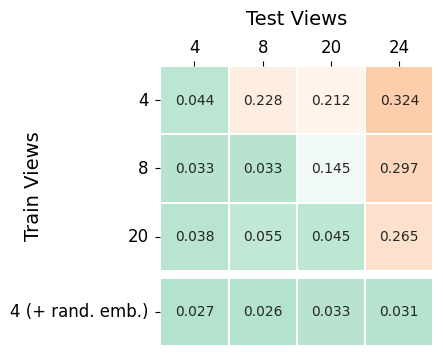

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Ensure the figures directory exists
import os
if not os.path.exists('./figures'):
    os.makedirs('./figures')

# Data
Train_views_top = ['4', '8', '20']
Data_top = [
    [0.044, 0.228, 0.212, 0.324],  # '4'
    [0.033, 0.033, 0.145, 0.297],  # '8'
    [0.038, 0.055, 0.045, 0.265],  # '20'
]

Train_views_bottom = ['4 (+ rand. emb.)']
Data_bottom = [
    [0.027, 0.026, 0.033, 0.031],  # '4 (+ rand. emb.)'
]

Test_views = ['4', '8', '20', '24']

# Create DataFrames
df_top = pd.DataFrame(Data_top, index=Train_views_top, columns=Test_views)
df_bottom = pd.DataFrame(Data_bottom, index=Train_views_bottom, columns=Test_views)

# Set up the figure with two subplots
fig, (ax_top, ax_bottom) = plt.subplots(
    nrows=2,
    ncols=1,
    sharex=True,
    figsize=(5, 4),
    gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.05}
)

# Increase font sizes for better readability
plt.rcParams.update({'font.size': 12})

# Create a custom colormap from light green to white to light red
colors = ['#b3e2cd', '#ffffff', '#fdcdac']  # Light green to white to light red
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

# Define vmin and vmax for consistent color mapping
vmin = min(df_top.min().min(), df_bottom.min().min())
vmax = max(df_top.max().max(), df_bottom.max().max())

# Plot the first heatmap
sns.heatmap(
    df_top,
    annot=True,
    fmt=".3f",
    cmap=cmap,
    cbar=False,
    linewidths=0.3,
    linecolor='white',
    square=True,
    annot_kws={'size': 10},
    ax=ax_top,
    vmin=vmin,
    vmax=vmax,
    xticklabels=False  # We'll set xticklabels manually
)

# Plot the second heatmap
sns.heatmap(
    df_bottom,
    annot=True,
    fmt=".3f",
    cmap=cmap,
    cbar=False,
    linewidths=0.3,
    linecolor='white',
    square=True,
    annot_kws={'size': 10},
    ax=ax_bottom,
    vmin=vmin,
    vmax=vmax,
    xticklabels=False,  # No x-axis labels on bottom plot
    yticklabels=True    # Show y-axis labels on bottom plot
)

# Adjust x-axis labels on the top plot
ax_top.xaxis.tick_top()
ax_top.xaxis.set_label_position('top')
ax_top.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

# Set x-axis tick positions and labels
num_cols = len(Test_views)
ax_top.set_xticks(np.arange(num_cols) + 0.5)
ax_top.set_xticklabels(Test_views, rotation=0, fontsize=12)

# Adjust y-axis labels for top plot
ax_top.set_yticklabels(df_top.index, rotation=0, fontsize=12)

# Adjust y-axis labels for bottom plot
ax_bottom.set_yticklabels(df_bottom.index, rotation=0, fontsize=12)

# Remove x-axis ticks and labels from the bottom plot
ax_bottom.tick_params(bottom=False, labelbottom=False)

# Add padding to y-axis tick labels on both plots to prevent overlap
ax_top.tick_params(axis='y', which='major', pad=5)
ax_bottom.tick_params(axis='y', which='major', pad=5)

# Remove individual axis labels
ax_top.set_ylabel('')
ax_bottom.set_ylabel('')

# Set a common ylabel centered across both subplots
fig.text(0.02, 0.55, 'Train Views', va='center', rotation='vertical', fontsize=14)

# Set x-axis label on the top plot
ax_top.set_xlabel('Test Views', fontsize=14, labelpad=10)

# Adjust the layout to make cells square and adjust spacing
plt.tight_layout()

# Reduce the whitespace around the figure
plt.subplots_adjust(left=0.18, right=0.95, top=0.85, bottom=0.15)

# Save the figure
plt.savefig('./figures/heatmap.pdf', bbox_inches='tight')

# Display the plot
plt.show()


# Data Scaling

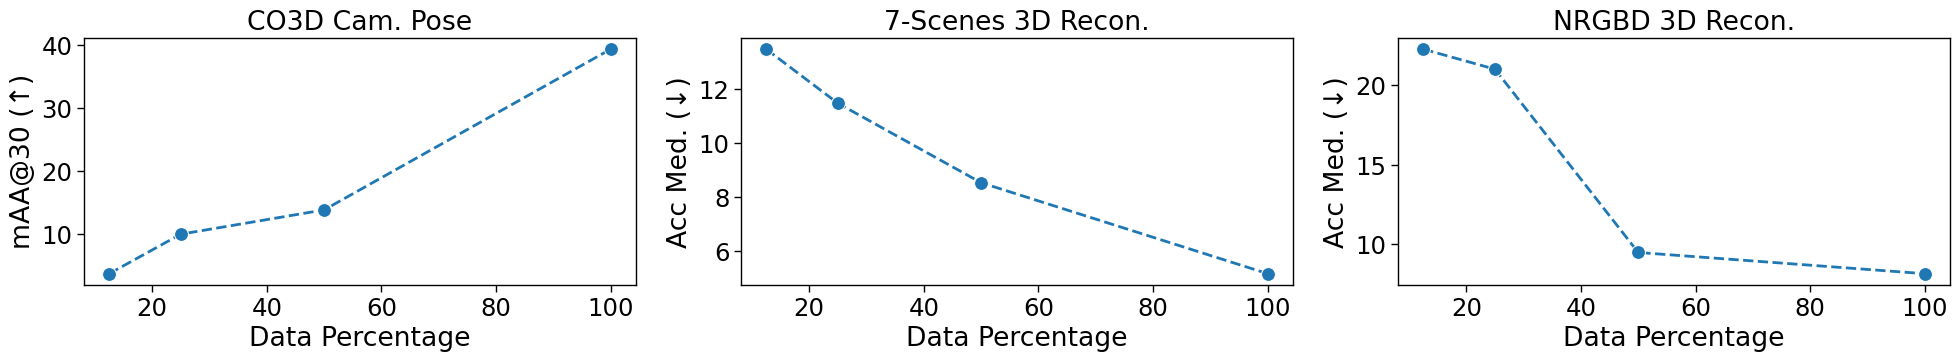

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Increase font sizes for readability in papers
sns.set_context("paper", font_scale=2.0)

# Data
co3d_data = pd.DataFrame({
    'Data Percentage': [12.5, 25, 50, 100],
    'mAA@30': [0.0365232937, 0.09945639223, 0.138118282, 0.394145757]
})

dtu_data = pd.DataFrame({
    'Data Percentage': [12.5, 25, 50, 100],
    'Acc Med.': [11.84453011, 10.31071281, 11.19746685, 11.19003773]
})

scenes7_data = pd.DataFrame({
    'Data Percentage': [12.5, 25, 50, 100],
    'Acc Med.': [0.134641856, 0.1146349013, 0.08524527401, 0.05160019174]
})

nrgbd_data = pd.DataFrame({
    'Data Percentage': [12.5, 25, 50, 100],
    'Acc Med.': [0.222400263, 0.2098409235, 0.09500524402, 0.08170455694]
})

# times 100 for cam pose and scenes7 and nrgbd
co3d_data['mAA@30'] *= 100
scenes7_data['Acc Med.'] *= 100
nrgbd_data['Acc Med.'] *= 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharex=True)

# Plot for Co3D Cam Pose
sns.lineplot(
    ax=axes[0],
    data=co3d_data,
    x='Data Percentage',
    y='mAA@30',
    marker='o',
    linestyle='--',
    linewidth=2,
    markersize=10
)
axes[0].set_title('CO3D Cam. Pose')
axes[0].set_xlabel('Data Percentage')
axes[0].set_ylabel('mAA@30 (↑)')  # higher is better

# Plot for DTU
# sns.lineplot(
#     ax=axes[1],
#     data=dtu_data,
#     x='Data Percentage',
#     y='Acc Med.',
#     marker='o',
#     linestyle='--',
#     markersize=10
# )
# axes[1].set_title('DTU')
# axes[1].set_xlabel('Data Percentage')
# axes[1].set_ylabel('Acc Med. (↓)')  # lower is better

# Plot for 7-Scenes
sns.lineplot(
    ax=axes[1],
    data=scenes7_data,
    x='Data Percentage',
    y='Acc Med.',
    marker='o',
    linestyle='--',
    linewidth=2,
    markersize=10
)
axes[1].set_title('7-Scenes 3D Recon.')
axes[1].set_xlabel('Data Percentage')
axes[1].set_ylabel('Acc Med. (↓)')  # lower is better

# Plot for NRGBD
sns.lineplot(
    ax=axes[2],
    data=nrgbd_data,
    x='Data Percentage',
    y='Acc Med.',
    marker='o',
    linestyle='--',
    linewidth=2,
    markersize=10
)
axes[2].set_title('NRGBD 3D Recon.')
axes[2].set_xlabel('Data Percentage')
axes[2].set_ylabel('Acc Med. (↓)')  # lower is better

plt.tight_layout()
fig.savefig('figures/data_scaling.pdf')  # Save the figure to a PDF file
plt.show()


# Model Scaling

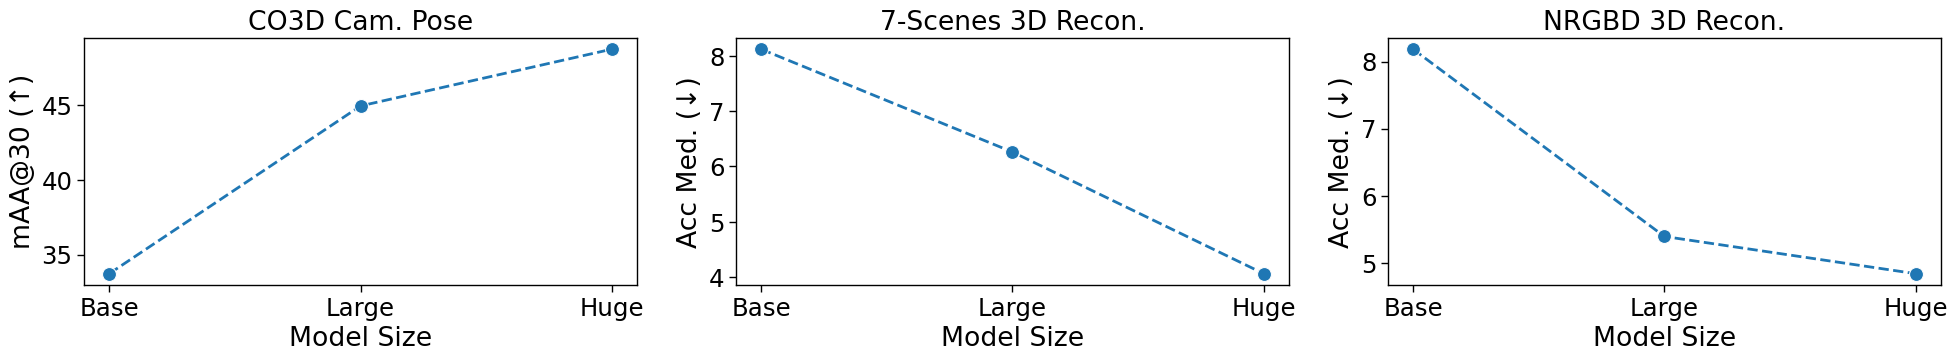

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Increase font sizes for readability in papers
sns.set_context("paper", font_scale=2.0)

# Data
co3d_data = pd.DataFrame({
    'Model Size': ['Base', 'Large', 'Huge'],
    'mAA@30': [0.3371744156, 0.4493130445, 0.4872640371]
})

dtu_data = pd.DataFrame({
    'Model Size': ['Base', 'Large', 'Huge'],
    'Acc Med.': [10.20337486, 7.801074982, 7.244336128]
})

scenes7_data = pd.DataFrame({
    'Model Size': ['Base', 'Large', 'Huge'],
    'Acc Med.': [0.08121348917, 0.06259633601, 0.04057122394]
})

nrgbd_data = pd.DataFrame({
    'Model Size': ['Base', 'Large', 'Huge'],
    'Acc Med.': [0.08185517788, 0.05390194058, 0.0483462885]
})

# times 100 for cam pose and scenes7 and nrgbd
co3d_data['mAA@30'] *= 100
scenes7_data['Acc Med.'] *= 100
nrgbd_data['Acc Med.'] *= 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharex=False)

# Plot for Co3D Cam Pose
sns.lineplot(
    ax=axes[0],
    data=co3d_data,
    x='Model Size',
    y='mAA@30',
    marker='o',
    linestyle='--',
    linewidth=2,
    markersize=10
)
axes[0].set_title('CO3D Cam. Pose')
axes[0].set_xlabel('Model Size')
axes[0].set_ylabel('mAA@30 (↑)')  # higher is better

# Plot for DTU
# sns.lineplot(
#     ax=axes[1],
#     data=dtu_data,
#     x='Model Size',
#     y='Acc Med.',
#     marker='o',
#     linestyle='dotted',
#     markersize=10
# )
# axes[1].set_title('DTU')
# axes[1].set_xlabel('Model Size')
# axes[1].set_ylabel('Acc Med. (↓)')  # lower is better

# Plot for 7-Scenes
sns.lineplot(
    ax=axes[1],
    data=scenes7_data,
    x='Model Size',
    y='Acc Med.',
    marker='o',
    linestyle='--',
    linewidth=2,
    markersize=10
)
axes[1].set_title('7-Scenes 3D Recon.')
axes[1].set_xlabel('Model Size')
axes[1].set_ylabel('Acc Med. (↓)')  # lower is better

# Plot for NRGBD
sns.lineplot(
    ax=axes[2],
    data=nrgbd_data,
    x='Model Size',
    y='Acc Med.',
    marker='o',
    linestyle='--',
    linewidth=2,
    markersize=10
)
axes[2].set_title('NRGBD 3D Recon.')
axes[2].set_xlabel('Model Size')
axes[2].set_ylabel('Acc Med. (↓)')  # lower is better

plt.tight_layout()
fig.savefig('figures/model_scaling.pdf')  # Save the figure to a PDF file
plt.show()
